### Issues
---
- to plot the change in normalised journey time over time, I binned the norm journey time into 30 mintes intervals and calcaulted the mean norm journey time in each bin
- however, for some reason, it skips some bins and I am not sure why

In [56]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
import glob

# ----------- LOAD DATA ----------- #
# ------------------ EVACUATION PROBABILITY DATA ------------------ #
# Evacuation Data
evacdata = pd.read_csv('./outputs/gy-evac prob-table_prop0p1t1.csv', skiprows=6).sort_values(by=['[run number]', 'ticks']).reset_index(drop=True)
# renaming the column to something that isn't cursed
evacdata.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacdata.columns = evacdata.columns.str.replace('-', '_')
evacdata.rename(columns={'evacuation_probability': 'evp'}, inplace=True)
# calculate time in minutes
evacdata['time_minutes'] = evacdata['ticks'] * evacdata['tick_time_in_mins'] # 1 tick = 0.25 minutes

# Journey Time Data
jm_files = glob.glob('./outputs/*jm*prop0p1t1*.csv')
journey_metrics_list = [pd.read_csv(file) for file in jm_files]
# Extract evacuation probability from file names and add as a column to each dataframe
for i, file in enumerate(jm_files):
    evp = float(file.split('_')[3][3:])  # Extract the probability from the filename
    journey_metrics_list[i]['evp'] = evp
# Concatenate the dataframes
journey_metrics = pd.concat(journey_metrics_list, ignore_index=True).sort_values(by=['evp', 'start_tick']).reset_index(drop=True)

# calculate normalised journey time
journey_metrics['normalised_journey_time'] = journey_metrics['actual_time'] / journey_metrics['ideal_time']
# calculate time in minutes
journey_metrics['start_time_minutes'] = journey_metrics['start_tick'] * 0.25 # 1 tick = 0.25 minutes

# calculate the mean normalised journey time every 30 minutes for each run
# Bin the start_tick at intervals of 120 (corresponding to 30 minutes)
journey_metrics['start_time_bin'] = pd.cut(journey_metrics['start_tick'], bins=np.arange(-15, journey_metrics['start_time_minutes'].max() + 45, 30))
# Calculate the mean normalised journey time for each bin
mean_normalised_journey_time_per_bin = journey_metrics.groupby('start_time_bin')['normalised_journey_time'].mean().reset_index()
# Calculate the mean normalised journey time for each bin for each run
mean_normalised_journey_time_per_bin_per_run = journey_metrics.groupby(['evp', 'start_time_bin'])['normalised_journey_time'].mean().reset_index()

# ------------------ POPULATION DATA ------------------ #
# evacuation data
evacpopfiles = glob.glob('./outputs/gy-evac pop-table*.csv')
evacpopdata = [pd.read_csv(file, skiprows=6) for file in evacpopfiles]
# extract the population from the file name and add it to the dataframe
for i, file in enumerate(evacpopfiles):
    pop = int(file.split('_')[-1].split('.')[0][1:])  # Extract the population from the filename
    evacpopdata[i]['population'] = pop
# Concatenate the dataframes
evacpopdata = pd.concat(evacpopdata, ignore_index=True).sort_values(by=['population', 'ticks']).reset_index(drop=True)
# renaming the column to something that isn't cursed
evacpopdata.rename(columns={'[run number]': 'run_number'}, inplace=True)
evacpopdata.columns = evacpopdata.columns.str.replace('-', '_')
# calculate time in minutes
evacpopdata['time_minutes'] = evacpopdata['ticks'] * evacpopdata['tick_time_in_mins'] # 1 tick = 0.25 minutes

# journey time data
jm_pop_files = glob.glob('./outputs/jm*pop.csv')
journey_metrics_pop_list = [pd.read_csv(file) for file in jm_pop_files]
# Extract population from file names and add as a column to each dataframe
for i, file in enumerate(jm_pop_files):
    pop = int(file.split('_')[2][1:])  # Extract the population from the filename
    journey_metrics_pop_list[i]['population'] = pop
# Concatenate the dataframes
journey_metrics_pop = pd.concat(journey_metrics_pop_list, ignore_index=True).sort_values(by=['population', 'start_tick']).reset_index(drop=True)
# calculate normalised journey time
journey_metrics_pop['normalised_journey_time'] = journey_metrics_pop['actual_time'] / journey_metrics_pop['ideal_time']
# calculate time in minutes
journey_metrics_pop['start_time_minutes'] = journey_metrics_pop['start_tick'] * 0.25 # 1 tick = 0.25

# calculate the mean normalised journey time every 30 minutes for each run
# Bin the start_tick at intervals of 120 (corresponding to 30 minutes)
journey_metrics_pop['start_time_bin'] = pd.cut(journey_metrics_pop['start_tick'], bins=np.arange(-15, journey_metrics_pop['start_time_minutes'].max() + 45, 30))
# Calculate the mean normalised journey time for each bin
mean_normalised_journey_time_per_bin_pop = journey_metrics_pop.groupby('start_time_bin')['normalised_journey_time'].mean().reset_index()
# Calculate the mean normalised journey time for each bin for each run
mean_normalised_journey_time_per_bin_per_run_pop = journey_metrics_pop.groupby(['population', 'start_time_bin'])['normalised_journey_time'].mean().reset_index()



In [46]:
journey_metrics.start_time_bin.unique()

[(-15.0, 15.0], (105.0, 135.0], (225.0, 255.0], (345.0, 375.0], (465.0, 495.0], ..., (2265.0, 2295.0], (2385.0, 2415.0], (2505.0, 2535.0], (2625.0, 2655.0], NaN]
Length: 24
Categories (23, interval[float64]): [(-15.0, 15.0] < (105.0, 135.0] < (225.0, 255.0] < (345.0, 375.0] ... (2265.0, 2295.0] < (2385.0, 2415.0] < (2505.0, 2535.0] < (2625.0, 2655.0]]

In [3]:
evacdata.head()

,run_number,over_break_p,terminate_evac_distance_km,initial_people,max_walking_distance_km,warning_interval_time_mins,evp,tick_time_in_mins,[step],ticks,get_no_active_cars,get_no_walking,get_no_evacuating,get_no_evacuated,get_no_in_cars,get_avg_no_people_per_car,time_minutes
0,1,0.06,0.3,15000,0.3,30,0.1,0.25,0,0,0,0,0,0,0,0.000000,0.00
1,1,0.06,0.3,15000,0.3,30,0.1,0.25,1,1,735,0,1380,2,1380,1.877551,0.25
2,1,0.06,0.3,15000,0.3,30,0.1,0.25,2,2,735,0,1380,2,1380,1.877551,0.50
3,1,0.06,0.3,15000,0.3,30,0.1,0.25,3,3,734,0,1376,6,1376,1.874659,0.75
4,1,0.06,0.3,15000,0.3,30,0.1,0.25,4,4,732,0,1372,10,1372,1.874317,1.00


In [4]:
mean_normalised_journey_time_per_bin_per_run.head()

,evp,start_time_bin,normalised_journey_time
0,0.1,"(90.0, 120.0]",28.678035
1,0.1,"(210.0, 240.0]",43.154110
2,0.1,"(330.0, 360.0]",54.683784
3,0.1,"(450.0, 480.0]",61.269889
4,0.1,"(570.0, 600.0]",70.824390


In [57]:
evacpopdata.head()

,run_number,over_break_p,terminate_evac_distance_km,initial_people,max_walking_distance_km,warning_interval_time_mins,evacuation_probability,tick_time_in_mins,[step],ticks,get_no_active_cars,get_no_walking,get_no_evacuating,get_no_evacuated,get_no_in_cars,get_avg_no_people_per_car,population,time_minutes
0,1,0.06,0.3,1000,0.3,30,0.3,0.25,0,0,0,0,0,0,0,0.000000,1000,0.00
1,1,0.06,0.3,1000,0.3,30,0.3,0.25,1,1,255,0,314,0,314,1.231373,1000,0.25
2,1,0.06,0.3,1000,0.3,30,0.3,0.25,2,2,255,0,314,0,314,1.231373,1000,0.50
3,1,0.06,0.3,1000,0.3,30,0.3,0.25,3,3,255,0,314,0,314,1.231373,1000,0.75
4,1,0.06,0.3,1000,0.3,30,0.3,0.25,4,4,255,0,314,0,314,1.231373,1000,1.00


# EVACUATION PROBABILITY

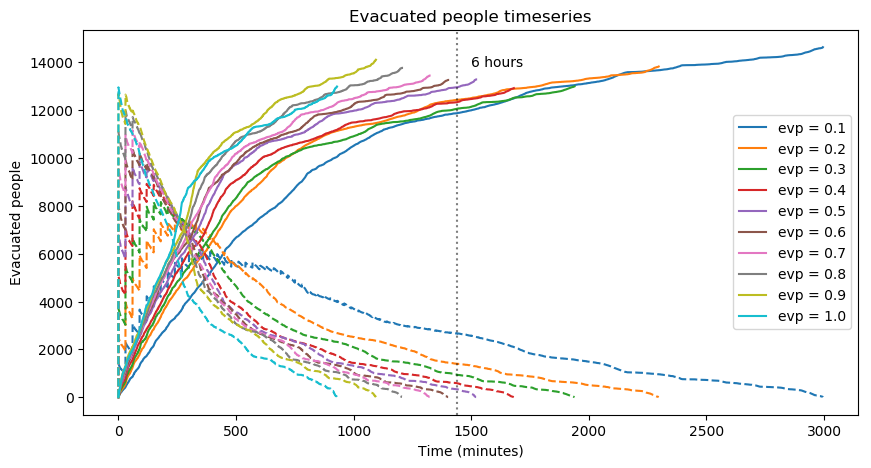

In [5]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each run
for prob in evacdata['evp'].unique():
    run_data = evacdata[evacdata['evp'] == prob]
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuated'], label=f'evp = {prob}')
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuating'], linestyle='--', color=ax.get_lines()[-1].get_color())

# # Calculate mean and standard deviation
# mean_values = evacdata.groupby('')['get_no_evacuated'].mean()
# std_values = evacdata.groupby('ticks')['get_no_evacuated'].std()

# # Plot mean
# plt.plot(mean_values.index.categories.mid, mean_values, 'k--', label='Mean')

# # Plot shaded area for standard deviation
# plt.fill_between(mean_values.index.categories.mid, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::2], labels[::2])
ax.set_title('Evacuated people timeseries')
ax.set_ylabel('Evacuated people')
ax.set_xlabel('Time (minutes)')
ax.axvline(x=1440, color='k', linestyle='dotted', alpha=0.5)
ax.annotate('6 hours', xy=(1440, ax.get_ylim()[1]), xytext=(1500, ax.get_ylim()[1] * 0.9))
#ax.set_xscale('log')

plt.show()

/home/amcquaid139/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


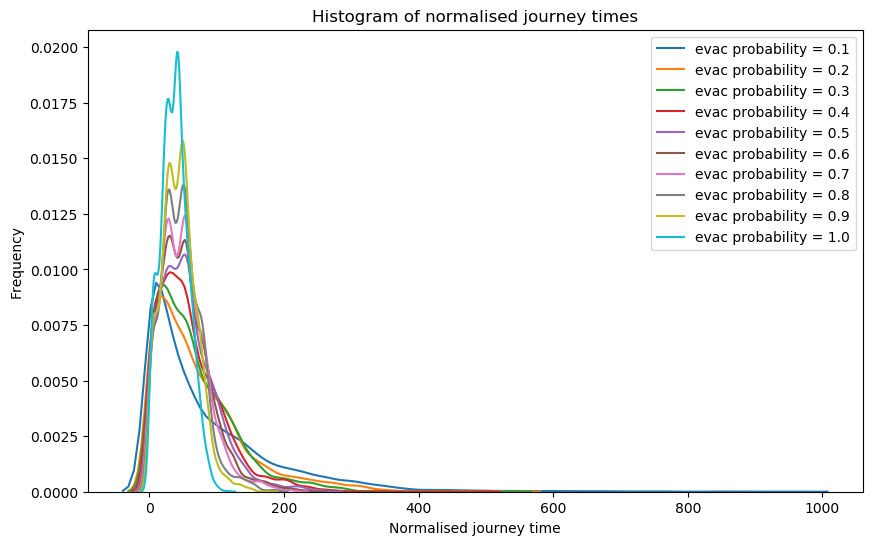

In [6]:
fig, ax = plt.subplots(figsize=(10, 6))

#ax.hist(journeytimes['norm_journey_time'], bins=40, density=True)

for prob in journey_metrics['evp'].unique():
    run_data = journey_metrics[journey_metrics['evp'] ==prob]
    sns.kdeplot(run_data['normalised_journey_time'], label=f'evac probability = {prob}')#, density=True)
ax.set_title('Histogram of normalised journey times')
ax.set_xlabel('Normalised journey time')
ax.set_ylabel('Frequency')
#ax.set_xscale('log')

plt.show()

In [7]:
# Claculating statistics on normalised journey time (all data)
journey_metrics_stats_all = journey_metrics.groupby('evp')['normalised_journey_time'].agg(['mean', 'std', 'max', 'min']).reset_index()
journey_metrics_stats_all['skew'] = journey_metrics.groupby('evp')['normalised_journey_time'].apply(stats.skew).values

print(journey_metrics_stats_all)

   evp       mean         std         max       min      skew
0  0.1  85.358564  100.750352  967.947020  0.294118  2.431662
1  0.2  73.342533   68.953534  549.174528  0.234192  1.673807
2  0.3  66.445820   57.128457  537.123421  0.294118  1.484977
3  0.4  59.888635   48.266853  495.099338  0.294118  1.407283
4  0.5  56.487774   41.758922  264.553753  0.294118  1.210706
5  0.6  53.191212   37.477574  241.315193  0.234192  1.109454
6  0.7  51.292436   34.279057  216.084519  0.234192  1.004389
7  0.8  48.075645   29.781575  188.257261  0.294118  0.843835
8  0.9  44.860779   25.926736  174.643494  0.468384  0.624673
9  1.0  38.107506   20.200897  114.756216  0.468384  0.300569


In [8]:
# Calculating statistics on normalised journey time (up to 6 hours only)
journey_metrics_filtered = journey_metrics[journey_metrics['start_tick'] < 1440]
journey_metrics_stats = journey_metrics_filtered.groupby('evp')['normalised_journey_time'].agg(['mean', 'std', 'max', 'min']).reset_index()
journey_metrics_stats['skew'] = journey_metrics_filtered.groupby('evp')['normalised_journey_time'].apply(stats.skew).values

print(journey_metrics_stats)

   evp       mean        std         max       min      skew
0  0.1  65.934070  63.282960  405.841446  0.294118  1.559537
1  0.2  69.107638  62.328712  422.670376  0.234192  1.558361
2  0.3  65.809162  55.542747  436.569987  0.294118  1.368924
3  0.4  59.610684  47.498414  294.300980  0.294118  1.283931
4  0.5  56.517949  41.752636  264.553753  0.294118  1.210908
5  0.6  53.191212  37.477574  241.315193  0.234192  1.109454
6  0.7  51.292436  34.279057  216.084519  0.234192  1.004389
7  0.8  48.075645  29.781575  188.257261  0.294118  0.843835
8  0.9  44.860779  25.926736  174.643494  0.468384  0.624673
9  1.0  38.107506  20.200897  114.756216  0.468384  0.300569


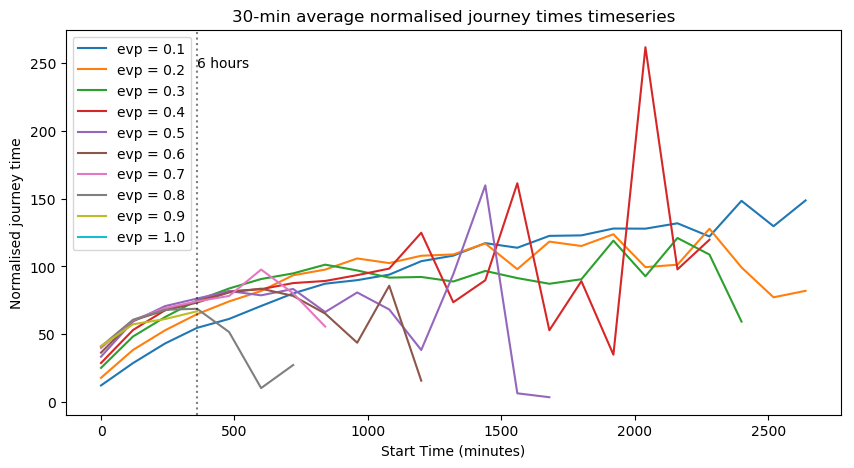

In [49]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each run
for prob in mean_normalised_journey_time_per_bin_per_run['evp'].unique():
    run_data = mean_normalised_journey_time_per_bin_per_run[mean_normalised_journey_time_per_bin_per_run['evp'] == prob]
    start_tick_midpoints = run_data['start_time_bin'].apply(lambda x: x.mid)
    plt.plot(list(start_tick_midpoints), run_data['normalised_journey_time'], label=f'evp = {prob}')

# # Calculate mean and standard deviation
# mean_values = mean_normalised_journey_time_per_bin.groupby('start_tick_bin')['normalised_journey_time'].mean()
# std_values = mean_normalised_journey_time_per_bin.groupby('start_tick_bin')['normalised_journey_time'].std()

# # Plot mean
# plt.plot(mean_values.index.categories.mid, mean_values, 'k--', label='Mean')

# # Plot shaded area for standard deviation
# plt.fill_between(mean_values.index.categories.mid, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.2)

ax.legend()
ax.set_title('30-min average normalised journey times timeseries')
ax.set_ylabel('Normalised journey time')
ax.set_xlabel('Start Time (minutes)')
ax.axvline(x=360, color='k', linestyle='dotted', alpha=0.5)
ax.annotate('6 hours', xy=(360, ax.get_ylim()[1]), xytext=(360, ax.get_ylim()[1] * 0.9))

plt.show()

/home/amcquaid139/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


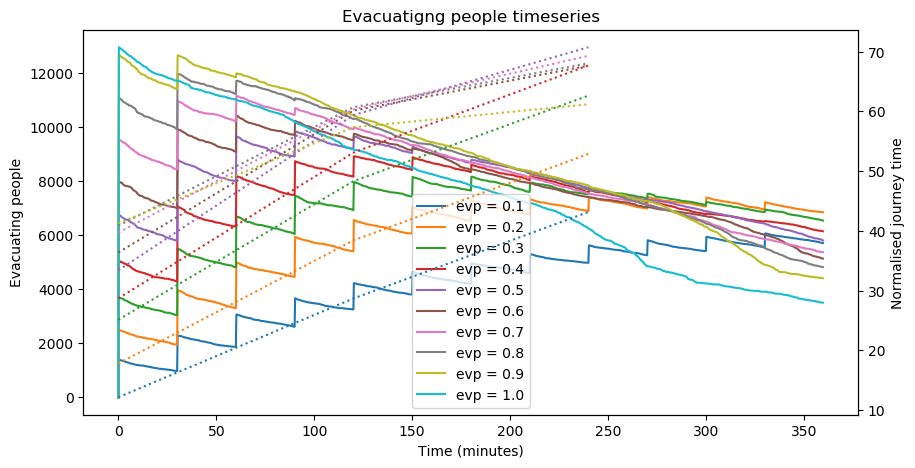

In [37]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# Plot no evacuating people for each run
for prob in evacdata['evp'].unique():
    run_data = evacdata[(evacdata['evp'] == prob) & (evacdata['time_minutes'] < 360)]
    #plt.plot(run_data["time_minutes"], run_data['get_no_evacuated'], label=f'evp = {prob}')
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuating'], label=f'evp = {prob}')#, linestyle='--', color=ax.get_lines()[-1].get_color())

# plot normalised journey time for each run
ax2 = ax.twinx()
ax2.set_ylabel('Normalised journey time')
for prob in mean_normalised_journey_time_per_bin_per_run['evp'].unique():
    run_data_1 = mean_normalised_journey_time_per_bin_per_run[mean_normalised_journey_time_per_bin_per_run['evp'] == prob]
    #run_data = run_data[run_data['start_time_bin'].apply(lambda x: x.mid) < 360]
    start_time_bin_midpoints = list(run_data_1['start_time_bin'].apply(lambda x: x.mid))
    #ax2.plot(start_time_midpoints, run_data['normalised_journey_time'], linestyle=':', label=f'evp = {prob}')
    run_data_1['start_time_bin_midpoints'] = start_time_bin_midpoints
    run_data = run_data_1[run_data_1['start_time_bin_midpoints'] < 360]
    ax2.plot(run_data['start_time_bin_midpoints'], run_data['normalised_journey_time'], linestyle=':', label=f'evp = {prob}')


# # Calculate mean and standard deviation
# mean_values = evacdata.groupby('')['get_no_evacuated'].mean()
# std_values = evacdata.groupby('ticks')['get_no_evacuated'].std()

# # Plot mean
# plt.plot(mean_values.index.categories.mid, mean_values, 'k--', label='Mean')

# # Plot shaded area for standard deviation
# plt.fill_between(mean_values.index.categories.mid, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
ax.legend()
ax.set_title('Evacuatigng people timeseries')
ax.set_ylabel('Evacuating people')
ax.set_xlabel('Time (minutes)')
# ax.axvline(x=1440, color='k', linestyle='dotted', alpha=0.5)
# ax.annotate('6 hours', xy=(1440, ax.get_ylim()[1]), xytext=(1500, ax.get_ylim()[1] * 0.9))
#ax.set_xscale('log')

plt.show()

/home/amcquaid139/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


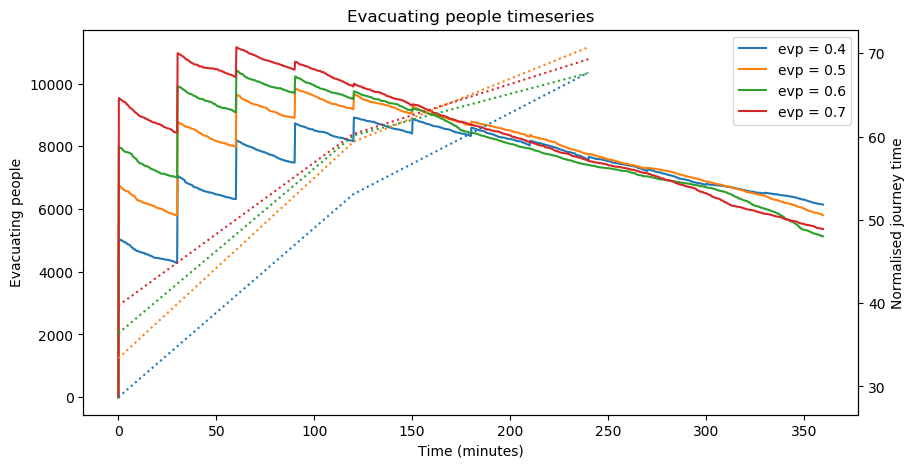

In [43]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# define the range of probabilities to plot
prob_range = [0.4, 0.5, 0.6, 0.7]
# Plot no evacuating people for each run
for prob in evacdata['evp'].unique():
    if prob in prob_range:
        run_data = evacdata[(evacdata['evp'] == prob) & (evacdata['time_minutes'] < 360)]
        #plt.plot(run_data["time_minutes"], run_data['get_no_evacuated'], label=f'evp = {prob}')
        plt.plot(run_data["time_minutes"], run_data['get_no_evacuating'], label=f'evp = {prob}')#, linestyle='--', color=ax.get_lines()[-1].get_color())

# plot normalised journey time for each run
ax2 = ax.twinx()
ax2.set_ylabel('Normalised journey time')
for prob in mean_normalised_journey_time_per_bin_per_run['evp'].unique():
    if prob in prob_range:
        run_data_1 = mean_normalised_journey_time_per_bin_per_run[mean_normalised_journey_time_per_bin_per_run['evp'] == prob]
        start_time_bin_midpoints = list(run_data_1['start_time_bin'].apply(lambda x: x.mid))
        run_data_1['start_time_bin_midpoints'] = start_time_bin_midpoints
        run_data = run_data_1[run_data_1['start_time_bin_midpoints'] < 360]
        ax2.plot(run_data['start_time_bin_midpoints'], run_data['normalised_journey_time'], linestyle=':', label=f'evp = {prob}')


# # Calculate mean and standard deviation
# mean_values = evacdata.groupby('')['get_no_evacuated'].mean()
# std_values = evacdata.groupby('ticks')['get_no_evacuated'].std()

# # Plot mean
# plt.plot(mean_values.index.categories.mid, mean_values, 'k--', label='Mean')

# # Plot shaded area for standard deviation
# plt.fill_between(mean_values.index.categories.mid, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
ax.legend()
ax.set_title('Evacuating people timeseries')
ax.set_ylabel('Evacuating people')
ax.set_xlabel('Time (minutes)')
# ax.axvline(x=1440, color='k', linestyle='dotted', alpha=0.5)
# ax.annotate('6 hours', xy=(1440, ax.get_ylim()[1]), xytext=(1500, ax.get_ylim()[1] * 0.9))
#ax.set_xscale('log')

plt.show()

^^ issues here:

- norm journey time should go up to a time of 360 minutes, however it stops prematurely (could be a consequence fo skipping bins?)

# POPULATION


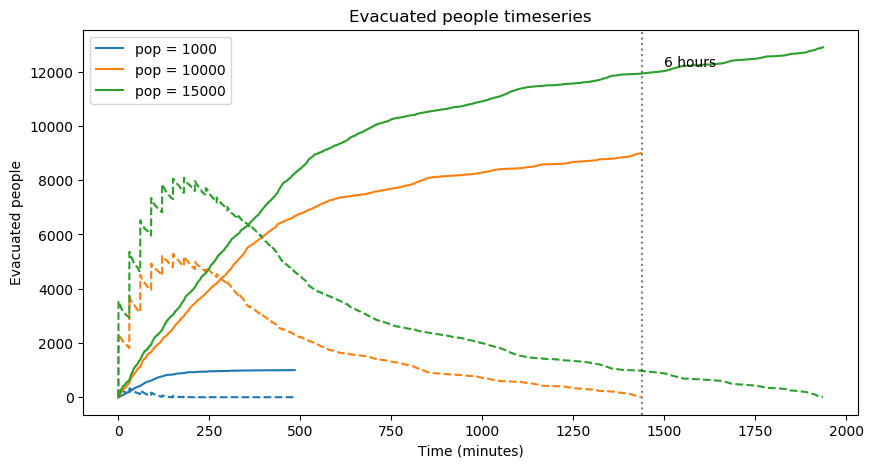

In [60]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each run
for pop in evacpopdata['population'].unique():
    run_data = evacpopdata[evacpopdata['population'] == pop]
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuated'], label=f'pop = {pop}')
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuating'], linestyle='--', color=ax.get_lines()[-1].get_color())

# # Calculate mean and standard deviation
# mean_values = evacdata.groupby('')['get_no_evacuated'].mean()
# std_values = evacdata.groupby('ticks')['get_no_evacuated'].std()

# # Plot mean
# plt.plot(mean_values.index.categories.mid, mean_values, 'k--', label='Mean')

# # Plot shaded area for standard deviation
# plt.fill_between(mean_values.index.categories.mid, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.2)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::2], labels[::2])
ax.set_title('Evacuated people timeseries')
ax.set_ylabel('Evacuated people')
ax.set_xlabel('Time (minutes)')
ax.axvline(x=1440, color='k', linestyle='dotted', alpha=0.5)
ax.annotate('6 hours', xy=(1440, ax.get_ylim()[1]), xytext=(1500, ax.get_ylim()[1] * 0.9))
#ax.set_xscale('log')

plt.show()

/home/amcquaid139/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


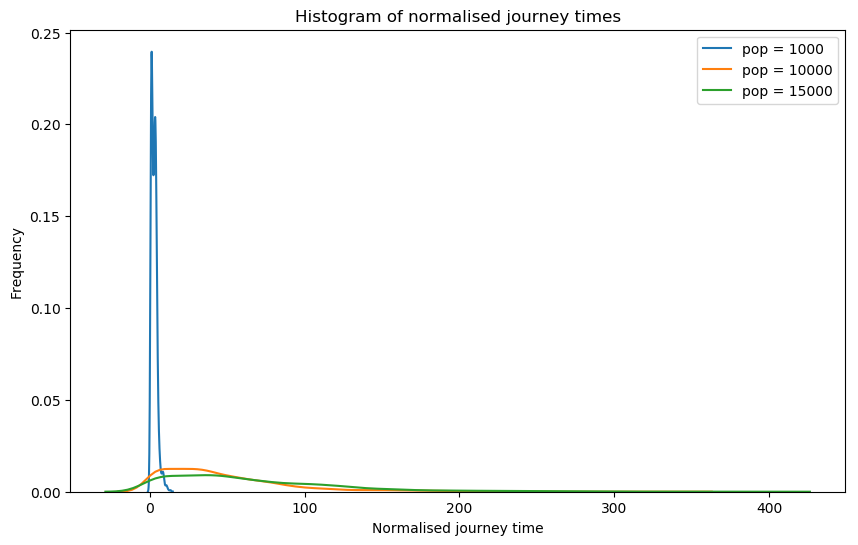

In [62]:
fig, ax = plt.subplots(figsize=(10, 6))

#ax.hist(journeytimes['norm_journey_time'], bins=40, density=True)

for pop in journey_metrics_pop['population'].unique():
    run_data = journey_metrics_pop[journey_metrics_pop['population'] ==pop]
    sns.kdeplot(run_data['normalised_journey_time'], label=f'pop = {pop}')#, density=True)
ax.set_title('Histogram of normalised journey times')
ax.set_xlabel('Normalised journey time')
ax.set_ylabel('Frequency')
#ax.set_xscale('log')

plt.show()

In [64]:
# Calculating statistics on normalised journey time (all data)
journey_metrics_stats_pop_all = journey_metrics_pop.groupby('population')['normalised_journey_time'].agg(['mean', 'std', 'max', 'min']).reset_index()
journey_metrics_stats_pop_all['skew'] = journey_metrics_pop.groupby('population')['normalised_journey_time'].apply(stats.skew).values

print(journey_metrics_stats_pop_all)

   population       mean        std         max       min      skew
0        1000   2.948656   1.870264   13.419913  0.445310  1.347348
1       10000  47.410270  42.053297  342.118537  0.234192  1.634702
2       15000  66.715883  57.971526  397.357441  0.294118  1.498497


In [65]:
# Calculating statistics on normalised journey time (all data)
journey_metrics_pop_filtered = journey_metrics_pop[journey_metrics_pop['start_tick'] < 1440]
journey_metrics_stats_pop = journey_metrics_pop_filtered.groupby('population')['normalised_journey_time'].agg(['mean', 'std', 'max', 'min']).reset_index()
journey_metrics_stats_pop['skew'] = journey_metrics_pop_filtered.groupby('population')['normalised_journey_time'].apply(stats.skew).values

print(journey_metrics_stats_pop)

   population       mean        std         max       min      skew
0        1000   2.970538   1.868945   13.419913  0.445310  1.344695
1       10000  47.481320  41.672317  342.118537  0.234192  1.632995
2       15000  66.089852  56.697474  397.357441  0.294118  1.470836


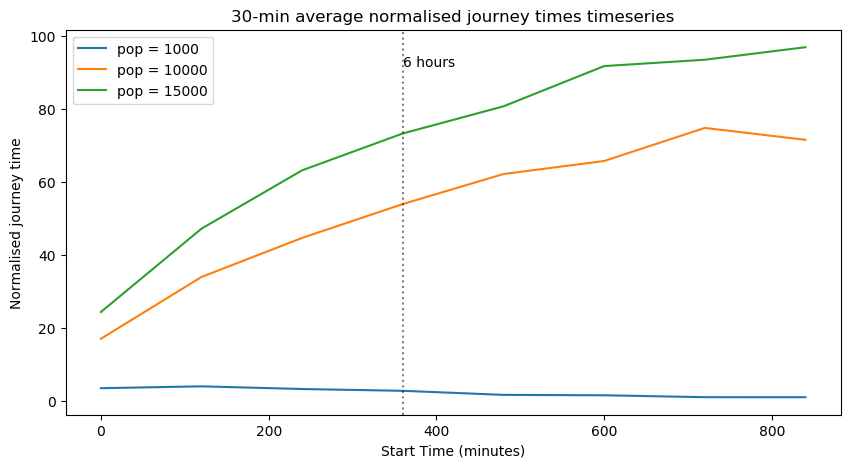

In [66]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# Plot each run
for pop in mean_normalised_journey_time_per_bin_per_run_pop['population'].unique():
    run_data = mean_normalised_journey_time_per_bin_per_run_pop[mean_normalised_journey_time_per_bin_per_run_pop['population'] == pop]
    start_tick_midpoints = run_data['start_time_bin'].apply(lambda x: x.mid)
    plt.plot(list(start_tick_midpoints), run_data['normalised_journey_time'], label=f'pop = {pop}')

# # Calculate mean and standard deviation
# mean_values = mean_normalised_journey_time_per_bin.groupby('start_tick_bin')['normalised_journey_time'].mean()
# std_values = mean_normalised_journey_time_per_bin.groupby('start_tick_bin')['normalised_journey_time'].std()

# # Plot mean
# plt.plot(mean_values.index.categories.mid, mean_values, 'k--', label='Mean')

# # Plot shaded area for standard deviation
# plt.fill_between(mean_values.index.categories.mid, mean_values - std_values, mean_values + std_values, color='gray', alpha=0.2)

ax.legend()
ax.set_title('30-min average normalised journey times timeseries')
ax.set_ylabel('Normalised journey time')
ax.set_xlabel('Start Time (minutes)')
ax.axvline(x=360, color='k', linestyle='dotted', alpha=0.5)
ax.annotate('6 hours', xy=(360, ax.get_ylim()[1]), xytext=(360, ax.get_ylim()[1] * 0.9))

plt.show()

/home/amcquaid139/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


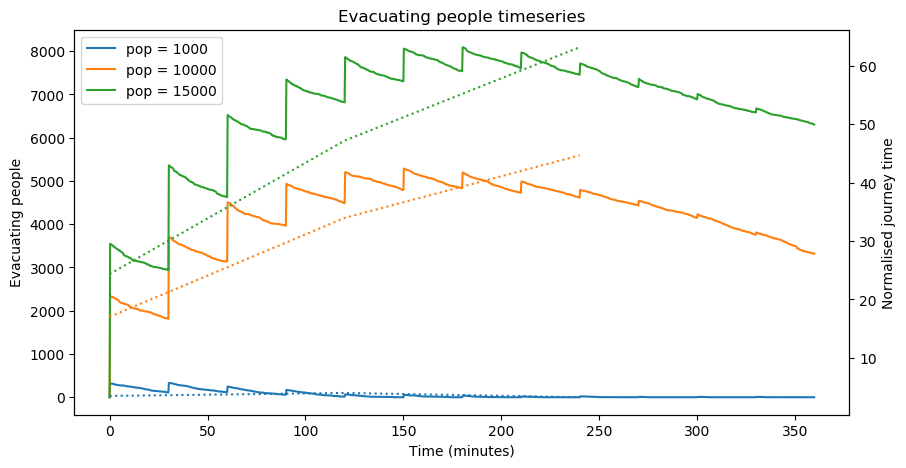

In [67]:
# NORMALISED JOURNEY TIMES TIME SERIES WITH MEAN AND STANDARD DEVIATION

fig, ax = plt.subplots(figsize=(10, 5))

# Plot no evacuating people for each run
for pop in evacpopdata['population'].unique():
    run_data = evacpopdata[(evacpopdata['population'] == pop) & (evacpopdata['time_minutes'] < 360)]
    plt.plot(run_data["time_minutes"], run_data['get_no_evacuating'], label=f'pop = {pop}')

# plot normalised journey time for each run
ax2 = ax.twinx()
ax2.set_ylabel('Normalised journey time')
for pop in mean_normalised_journey_time_per_bin_per_run_pop['population'].unique():
    run_data_1 = mean_normalised_journey_time_per_bin_per_run_pop[mean_normalised_journey_time_per_bin_per_run_pop['population'] == pop]
    start_time_bin_midpoints = list(run_data_1['start_time_bin'].apply(lambda x: x.mid))
    run_data_1['start_time_bin_midpoints'] = start_time_bin_midpoints
    run_data = run_data_1[run_data_1['start_time_bin_midpoints'] < 360]
    ax2.plot(run_data['start_time_bin_midpoints'], run_data['normalised_journey_time'], linestyle=':', label=f'pop = {pop}')

handles, labels = ax.get_legend_handles_labels()
ax.legend()
ax.set_title('Evacuating people timeseries')
ax.set_ylabel('Evacuating people')
ax.set_xlabel('Time (minutes)')

plt.show()


# More Sophisticated Shtuff
---

In [ ]:
fig = plt.figure
ax = fig.gca(projection='3d')


